In [ ]:
#각각의 확률로 다른 상태로 변하는 것을 볼 수 있다.

#전체코드

<ipython-input-1-41cbb9d99158>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pi_to_graph=[int(np.where(pi_list[i] == 1)[0])+1 for i in range(len(pi_list))]


([<matplotlib.axis.YTick at 0x79e9d01b9b40>,
 [Text(0, 1, '1(Sunny)'), Text(0, 2, '2(Cloudy)'), Text(0, 3, '3(Rainy)')])

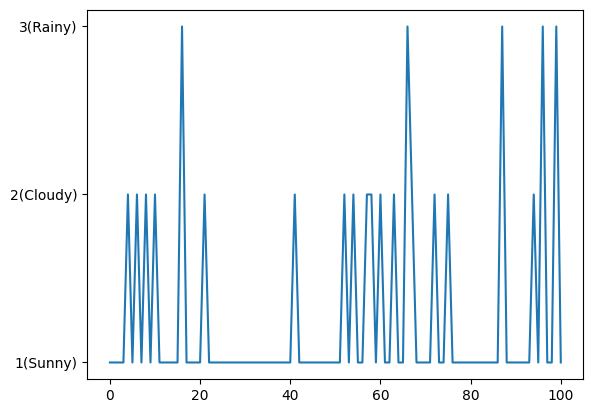

In [1]:
import numpy as np
import matplotlib.pyplot as plt

pi_0 =  np.array([1,0,0])
pi_list=[pi_0]
P = np.array([[0.7,0.2,0.1], [0.3,0.65,0.05], [0.15,0.35,0.5]])
################################################################################

def make_new_pi(pi_0):
  rd = np.random.uniform(0,1)
  new_pi = np.array([0,0,0])
  sum=0
  for i in range(3):
    sum += pi_0.dot(P)[i]
    if rd < sum:
      new_pi[i] = 1
      break
  return new_pi
################################################################################

for i in range(100): #100번 돌림
  pi_list.append(make_new_pi(pi_0))
################################################################################

pi_to_graph=[int(np.where(pi_list[i] == 1)[0])+1 for i in range(len(pi_list))]

plt.plot(pi_to_graph)
plt.yticks([1,2,3],['1(Sunny)','2(Cloudy)','3(Rainy)'])

# 과정

### 초기값

In [2]:
import numpy as np

In [3]:
pi_0 =  np.array([1,0,0])#Sunny
pi_0

array([1, 0, 0])

In [13]:
P = np.array([[0.7,0.2,0.1], [0.3,0.65,0.05], [0.15,0.35,0.5]]) #각각의 조건부 확률 설정 (suuny, cloudy, rainy)
print(P)

#sunny일때, 다음이 [ sunny일 확률(0.7). cloudy일 확률(0.2), rainy일 확률(0.1) ]
#cloudy일때, 다음이 [ sunny일 확률(0.3). cloudy일 확률(0.65), rainy일 확률(0.05) ]
#rainy일때, 다음이 [ sunny일 확률(0.15). cloudy일 확률(0.35), rainy일 확률(0.5) ]

[[0.7  0.2  0.1 ]
 [0.3  0.65 0.05]
 [0.15 0.35 0.5 ]]


### pi(t+1) 구하기

In [5]:
# pi(t)가 주어졌을 때, pi(t+1)를 출력

#states = 3  # 상태의 종류의 개수
#pi_0 =  np.array([1,0,0])
#P = np.array([[0.7,0.2,0.1], [0.3,0.65,0.05], [0.15,0.35,0.5]])



rd = np.random.uniform(0,1)

new_pi = np.zeros(3)# 반환 될 pi(t+1)의 초기값. 일단 모두 0으로 채움
sum=0
for i in range(3):
  sum += pi_0.dot(P)[i] # t에 해당하는 행에서만 하나씩 뽑아서 더함

  if rd < sum:
    new_pi[i] = 1 #0으로 이루어진 어레이에서 하나의 인덱스에서만 1로 변경
    break

print(rd, new_pi)

0.7087338237469433 [0. 1. 0.]


### 함수화

In [6]:
# 위의 코드를 함수화 (위랑 같은 코드)

def make_new_pi(pi_0): # pi(t)가 주어졌을 때, pi(t+1)를 반환

  rd = np.random.uniform(0,1)
  new_pi = np.zeros(3)
  sum=0
  for i in range(3):
    sum += pi_0.dot(P)[i]
    if rd < sum:
      new_pi[i] = 1
      break

  return new_pi

### 실행

In [7]:
pi_0 =  np.array([1,0,0]) #초기값
pi_list=[pi_0] #전체 리스트의 초기값

for i in range(100): #100번 돌림
  pi_list.append(make_new_pi(pi_0)) # 함수로 나온 출력값을 위줄에서 만든 리스트에 넣음

In [8]:
pi_list[:10] # 10개만 확인

[array([1, 0, 0]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([0., 1., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0.]),
 array([0., 0., 1.]),
 array([1., 0., 0.])]

# 그래프 그리기

### 변환 ex) [1,0,0] => 1, [0,1,0] => 2, [0,0,1] => 3

In [9]:
#그래프를 그리기위해 변환 ex) [1,0,0] => 1, [0,1,0] => 2, [0,0,1] => 3
#np.where(pi_list[3] == 1)[0]+1 로 변환이 됨
#아래는 과정을 보여줌

print(pi_list[0])
print(np.where(pi_list[0] == 1)) #어레이에서 1의 위치(인덱스)를 가져옴
print(np.where(pi_list[0] == 1)[0]+1, end='\n \n')

print(pi_list[1])
print(np.where(pi_list[1] == 1)[0]+1, end='\n \n')

print(pi_list[3])
print(np.where(pi_list[3] == 1)[0]+1)

[1 0 0]
(array([0]),)
[1]
 
[0. 1. 0.]
[2]
 
[1. 0. 0.]
[1]


In [10]:
pi_to_graph=[np.where(pi_list[i] == 1)[0]+1 for i in range(len(pi_list))]
print(pi_to_graph[:10]) # 10개만 확인

[array([1]), array([2]), array([1]), array([1]), array([1]), array([2]), array([1]), array([1]), array([3]), array([1])]


### 그래프

([<matplotlib.axis.YTick at 0x79e9d0107130>,
 [Text(0, 1, '1(Sunny)'), Text(0, 2, '2(Cloudy)'), Text(0, 3, '3(Rainy)')])

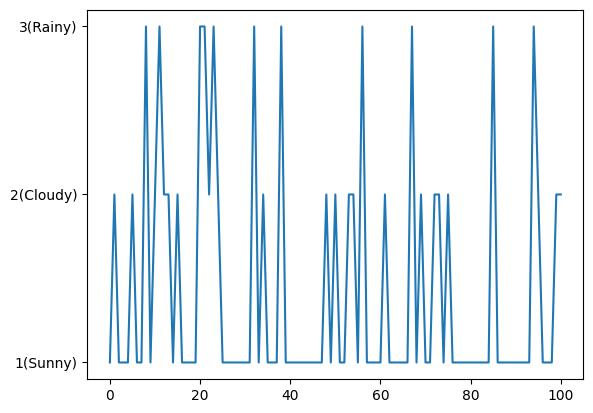

In [11]:
import matplotlib.pyplot as plt
plt.plot(pi_to_graph)
plt.yticks([1,2,3],['1(Sunny)','2(Cloudy)','3(Rainy)'])